── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




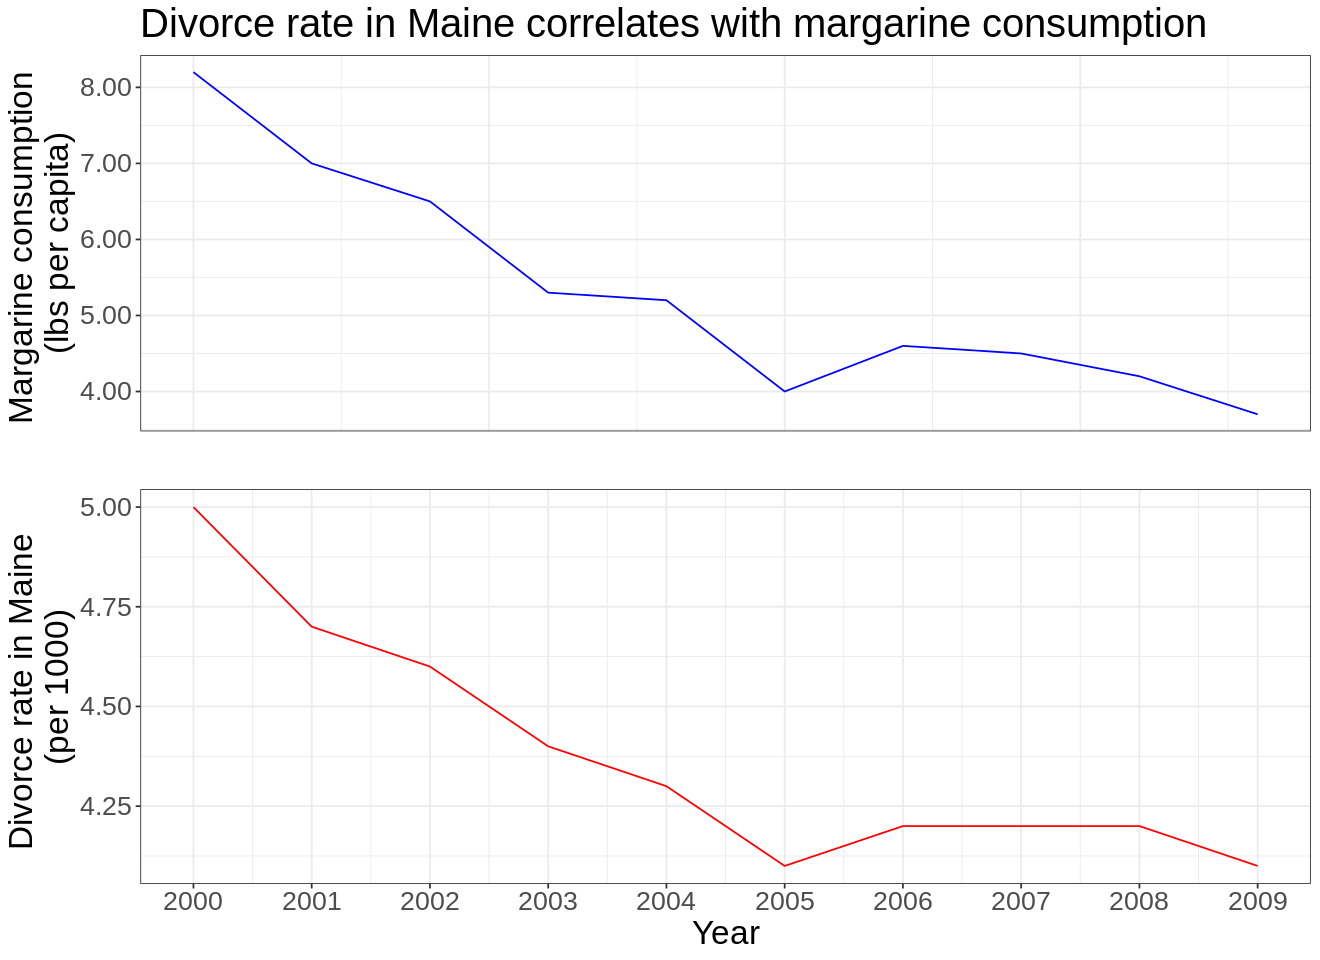

In [1]:
library(tidyverse)
library(cowplot)
library(scales)

# Data sourced from the Spurious Correlations website (http://www.tylervigen.com/spurious-correlations)
should_have_bought_butter <- tibble(margarine_consumption = c(8.2, 7, 6.5, 5.3, 5.2,
                                                             4, 4.6, 4.5, 4.2, 3.7),
                                   maine_divorce_rate = c(5, 4.7, 4.6, 4.4, 4.3,
                                                         4.1, 4.2, 4.2, 4.2, 4.1),
                                   year = c(2000, 2001, 2002, 2003, 2004,
                                           2005, 2006, 2007, 2008, 2009))

marg_vs_time <- should_have_bought_butter |> 
    ggplot(aes(x = year, y = margarine_consumption)) +
        geom_line(colour = "Blue") + 
        labs(x = "", y = "Margarine consumption \n(lbs per capita)", 
             title = "Divorce rate in Maine correlates with margarine consumption") +
        theme_bw() +
        theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank()) +
        theme(text = element_text(size = 20)) +
        scale_y_continuous(labels = number_format(accuracy = 0.01))


divorce_rate_vs_time <- should_have_bought_butter |> 
    ggplot(aes(x = year, y = maine_divorce_rate)) +
        geom_line(colour = "Red") + 
        labs(x = "Year", y = "Divorce rate in Maine \n(per 1000)") +
        scale_x_continuous(breaks = 0:2100) +
        theme_bw() +
        theme(text = element_text(size = 20)) 

options(repr.plot.width = 11, repr.plot.height = 8)
plot_grid(marg_vs_time, divorce_rate_vs_time, ncol = 1)